In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"


df = pd.read_json(url)


In [3]:

columnas_anidadas = ['customer', 'phone', 'internet', 'account']


columnas_normalizadas = []
for col in columnas_anidadas:
    df_norm = pd.json_normalize(df[col])
    df_norm.columns = [f"{col}.{subcol}" for subcol in df_norm.columns]
    columnas_normalizadas.append(df_norm)

df_final = df.drop(columns=columnas_anidadas)
df_final = pd.concat([df_final] + columnas_normalizadas, axis=1)


In [4]:

print("Duplicados:", df_final.duplicated().sum())

df_final['Churn'] = df_final['Churn'].replace({'Sí': 1, 'No': 0})

binarias = ['account.PaperlessBilling', 'customer.Partner', 'customer.Dependents']
for col in binarias:
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})

df_final['account.Cuentas_Diarias'] = df_final['account.Charges.Monthly'] / 30

df_final['account.Charges.Total'] = pd.to_numeric(df_final['account.Charges.Total'], errors='coerce')
df_final['account.Charges.Monthly'] = pd.to_numeric(df_final['account.Charges.Monthly'], errors='coerce')

df_final = df_final.dropna(subset=['Churn', 'account.Charges.Total', 'customer.tenure'])

print("Valores únicos de Churn:", df_final['Churn'].unique())


Duplicados: 0
Valores únicos de Churn: [0 'Yes' '']


In [6]:

print(df_final.describe())


print(df_final.describe(include='object'))


       customer.SeniorCitizen  customer.Partner  customer.Dependents  \
count               7256.0000       7256.000000          7256.000000   
mean                   0.1629          0.483600             0.299063   
std                    0.3693          0.499765             0.457879   
min                    0.0000          0.000000             0.000000   
25%                    0.0000          0.000000             0.000000   
50%                    0.0000          0.000000             0.000000   
75%                    0.0000          1.000000             1.000000   
max                    1.0000          1.000000             1.000000   

       customer.tenure  account.PaperlessBilling  account.Charges.Monthly  \
count      7256.000000               7256.000000              7256.000000   
mean         32.395535                  0.593716                64.755423   
std          24.558067                  0.491173                30.125739   
min           1.000000                  0.0

In [12]:
df_final['Churn'] = df_final['Churn'].astype(str).str.strip()


In [13]:
df_final['Churn'] = df_final['Churn'].replace({
    'Yes': 1,
    'No': 0,
    'Sí': 1,
    'No': 0,
    '1': 1,
    '0': 0,
    '': None,
    'nan': None
})


/tmp/ipython-input-4027014231.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['Churn'] = df_final['Churn'].replace({


In [14]:
df_final['Churn'] = pd.to_numeric(df_final['Churn'], errors='coerce')

print(df_final['Churn'].unique())

df_final = df_final.dropna(subset=['Churn'])


[ 0.  1. nan]


Conteo de churn:
 Churn
0.0    5163
1.0    1869
Name: count, dtype: int64


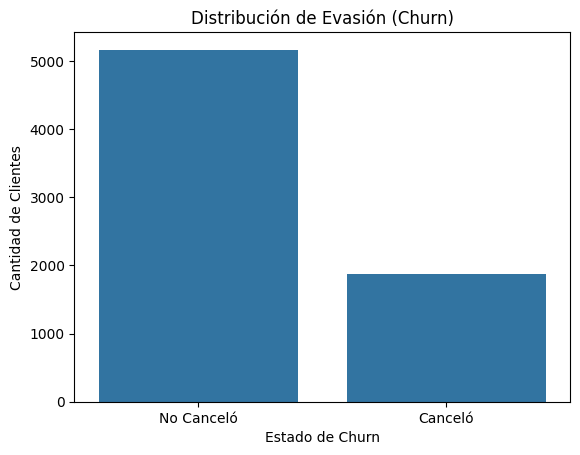

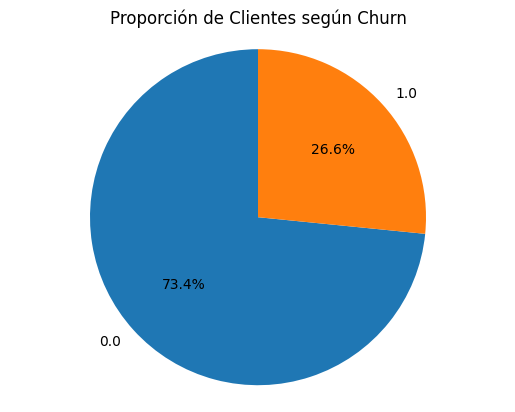

In [16]:

churn_counts = df_final['Churn'].value_counts()
print("Conteo de churn:\n", churn_counts)

sns.countplot(data=df_final, x='Churn')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Estado de Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()

plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Clientes según Churn')
plt.axis('equal')
plt.show()

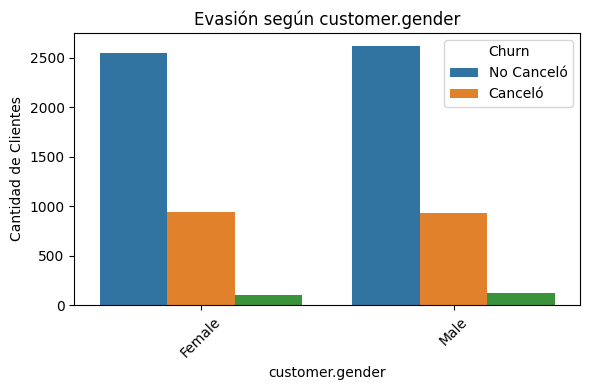

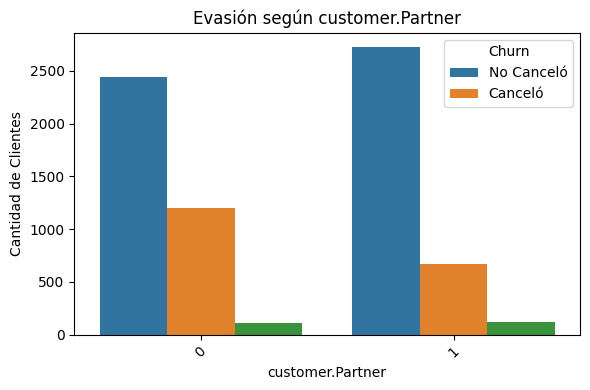

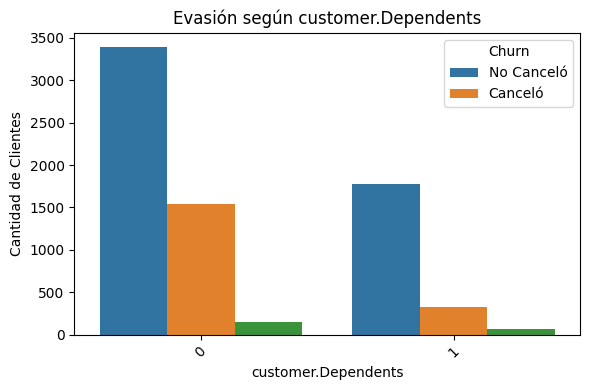

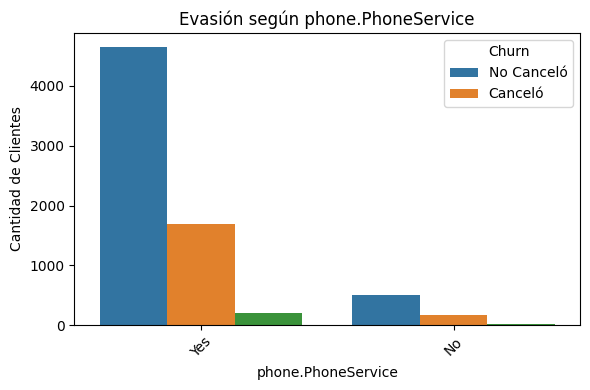

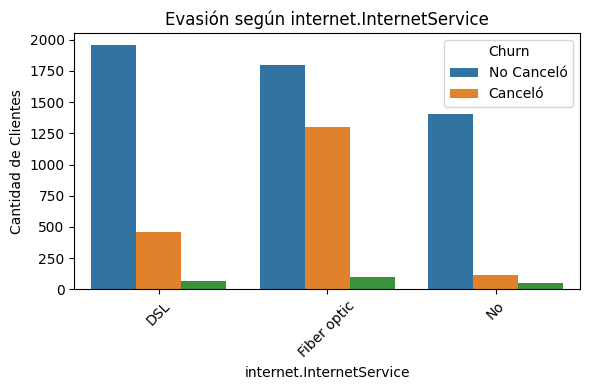

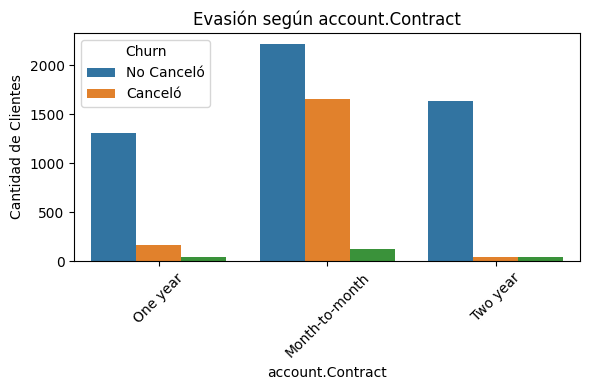

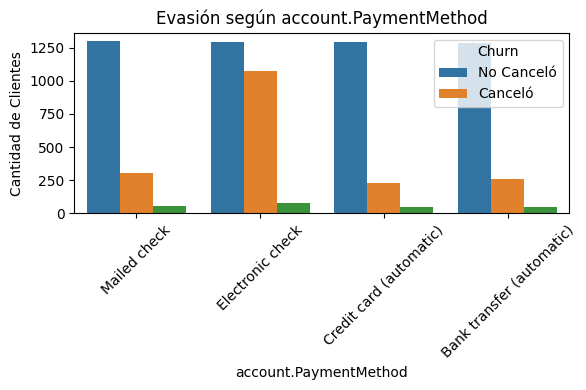

In [8]:

categoricas = ['customer.gender', 'customer.Partner', 'customer.Dependents',
               'phone.PhoneService', 'internet.InternetService',
               'account.Contract', 'account.PaymentMethod']

for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_final, x=col, hue='Churn')
    plt.title(f'Evasión según {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Churn', labels=['No Canceló', 'Canceló'])
    plt.tight_layout()
    plt.show()


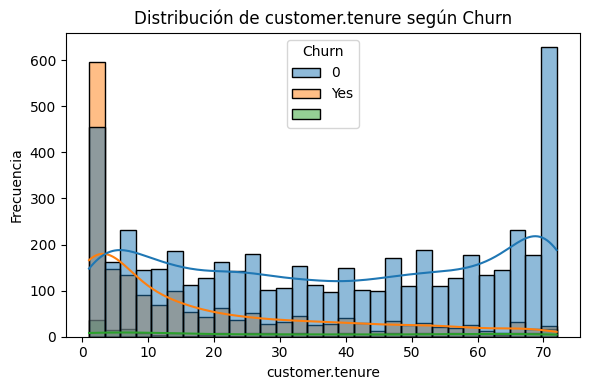

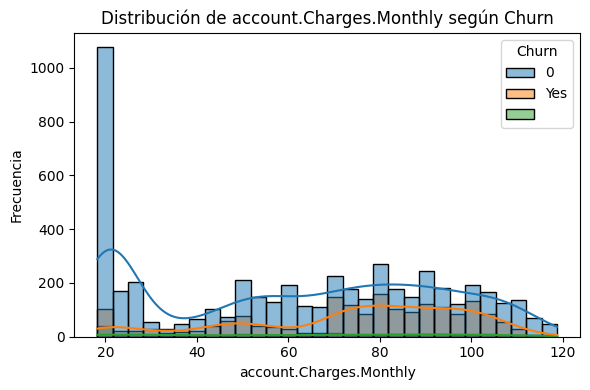

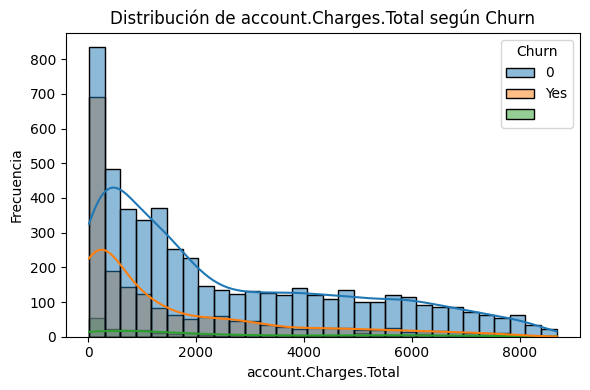

In [9]:

numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df_final, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribución de {col} según Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


# Informe Final: Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (churn) dentro de una empresa de telecomunicaciones. La pérdida de clientes representa un desafío crítico, ya que impacta directamente en los ingresos y la sostenibilidad del negocio. A través de este estudio, se busca identificar patrones y variables asociadas al churn para proponer estrategias que mejoren la retención.

---

## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos:

- **Importación de fuentes**: Se integraron datasets relacionados con clientes, servicios, cuentas y llamadas.
- **Unificación de estructuras**: Se combinaron tablas mediante claves comunes para formar un dataset consolidado.
- **Tratamiento de valores nulos**: Se eliminaron o imputaron registros incompletos para asegurar la calidad del análisis.
- **Conversión de tipos de datos**: Se ajustaron formatos (por ejemplo, fechas y valores numéricos) para facilitar el procesamiento.
- **Codificación de variables categóricas**: Se transformaron variables como género, tipo de contrato y método de pago para su análisis visual y estadístico.

---

## 🔹 Análisis Exploratorio de Datos

Se realizaron múltiples visualizaciones para identificar patrones de evasión:

### Distribución General de Churn
- **26.6%** de los clientes cancelaron el servicio.
- La evasión representa una proporción significativa que requiere atención estratégica.

### Variables Demográficas
- **Clientes sin pareja o sin dependientes** presentan mayor tasa de cancelación.
- El **género** no muestra diferencias significativas en la evasión.

### Servicios Contratados
- Los clientes **sin servicio telefónico** o con **fibra óptica** tienen mayor churn.
- El tipo de servicio influye en la satisfacción y permanencia.

### Tipo de Contrato
- El contrato **mes a mes** tiene la mayor tasa de cancelación.
- Contratos de **1 o 2 años** muestran mayor fidelidad.

### Método de Pago
- **Cheque electrónico** se asocia con mayor churn.
- Métodos automáticos como **tarjeta de crédito** y **transferencia bancaria** tienen menor evasión.

### Variables de Permanencia y Costo
- Clientes con **menos meses de antigüedad** tienden a cancelar más.
- **Cargos mensuales altos** se relacionan con mayor churn.
- **Cargos totales bajos** indican cancelaciones tempranas.

---

## Conclusiones e Insights

- La **antigüedad del cliente** es un predictor clave: los primeros meses son críticos para la retención.
- El **tipo de contrato** influye fuertemente: compromisos a largo plazo reducen la evasión.
- **Costos mensuales elevados** pueden generar insatisfacción si no están acompañados de valor percibido.
- **Clientes sin vínculos familiares** (sin pareja o dependientes) tienden a cancelar más, lo que sugiere que la estabilidad personal influye en la fidelidad.
- El **método de pago** refleja comodidad y compromiso: automatización favorece la permanencia.

---

## Recomendaciones Estratégicas

1. **Fortalecer la experiencia en los primeros meses**:
   - Ofrecer beneficios exclusivos para nuevos clientes.
   - Implementar seguimiento personalizado durante los primeros 90 días.

2. **Incentivar contratos a largo plazo**:
   - Promociones para migrar de mes a mes a contratos anuales.
   - Bonificaciones por permanencia.

3. **Revisar estructura de precios**:
   - Ajustar cargos mensuales para clientes con menor uso.
   - Ofrecer paquetes personalizados según perfil de consumo.

4. **Optimizar servicios de fibra óptica**:
   - Evaluar calidad y soporte técnico para reducir insatisfacción.

5. **Fomentar métodos de pago automáticos**:
   - Descuentos por uso de tarjeta o débito automático.
   - Campañas educativas sobre comodidad y seguridad de estos métodos.
